<a href="https://colab.research.google.com/github/Jimeens/PGF5393_IA/blob/main/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2

Lucas R. Ximenes dos Santos - 11917239

---

Fazer uma análise de regressão supervisionada para determinar a temperatura crítica de materiais. Utilizar diferentes modelos e subconjuntos de cados, comparando o desempenho e a interpretabilidade.

# 1. Análise exploratória

### Descrição do conjunto de dados:

Vamos utilizar um conjunto de dados sobre supercondutividade, onde carregamos os dados pelo comando abaixo:

In [ ]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/tiagofiorini/MLinPhysics.git
    import os as os
    os.chdir('./MLinPhysics')

Cloning into 'MLinPhysics'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 117 (delta 31), reused 24 (delta 24), pack-reused 74 (from 1)
Receiving objects: 100% (117/117), 29.16 MiB | 28.68 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [ ]:
import pandas as pd

dados = pd.read_csv('Superconductivity.csv')

Antes de começar a analisar e tratar os dados, é necessário verificar a existência ou não de valores ausentes no conjunto.

In [ ]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

Não tendo, podemos partir pra análise inicial dos dados. É interessante verificar as caracteríticas principais das variáveis.

In [ ]:
dados.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


Aqui podemos ver que existe uma disparidade nas escalas das variáveis, onde algumas estão em torno de de um pequeno intervalo (`entropy_fie`, por exemplo, que está entre [0,2.15] aproximadanete) e outras em um grande intervalo, de escala muito maior (`wtd_mean_fie`, por exemplo, que está entre [375.5, 1348] aproximadamente). Isto sugere um reescalonamento nos dados.

Sendo a temperatura crítica (`critical_temp`) nossa variável alvo, podemos verificar sua distribuição utilizando as bibliotecas `matplotlib.pyplot` e `seaborn`.

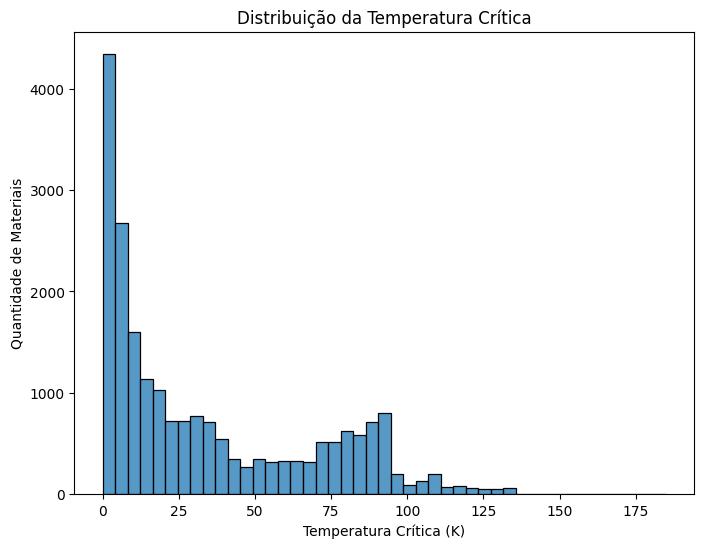

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(dados['critical_temp'])
plt.title('Distribuição da Temperatura Crítica')
plt.xlabel('Temperatura Crítica (K)')
plt.ylabel('Quantidade de Materiais')
plt.show()

Vemos nesta distribuição um comportamento relativamente assimétrico, onde há um pico inicial e uma espécie de "cauda" conforme a temperatura aumenta, o que sugere uma transformação logaritmica desta variável para normalizar seus valores.

Pela grande quantidade de variáveis do conjunto de dados, seria interessante verificar quais dos atributos possuem maior correlação com a temperatura crítica, o que pode ser feito a partir de um `heatmap`.

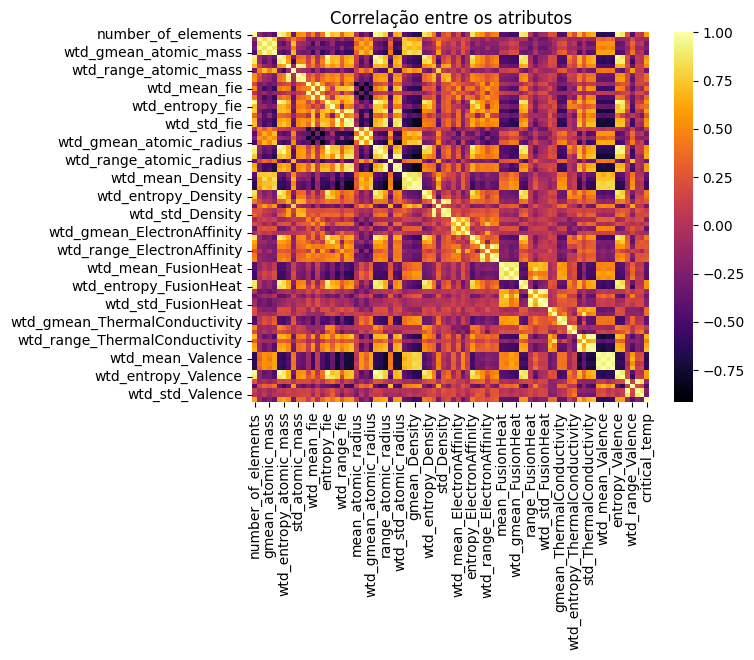

In [ ]:
sns.heatmap(dados.corr(), cmap='inferno')
plt.title('Correlação entre os atributos')
plt.show()

Pela quantidade de atributos do conjunto de dados, torna-se um pouco difícil estabelecer quais são as variáveis que mais se correlacionam com a temperatura crítica, o que sugere uma outra forma de verificação desta correlação, que pode ser feita com a função `corr()`, verificando quais são os maiores valores (em módulo) .

In [ ]:
import numpy as np

# Atributos com correlação positiva
corrTempCrit = dados.corr()['critical_temp'].sort_values(ascending=False)
print(np.abs(corrTempCrit.head(10+1))) # 10 atributos + temperatura crítica

critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
wtd_entropy_atomic_mass        0.626930
wtd_entropy_atomic_radius      0.603494
number_of_elements             0.601069
range_fie                      0.600790
wtd_std_atomic_radius          0.599199
entropy_Valence                0.598591
Name: critical_temp, dtype: float64


In [ ]:
# Atributos com correlação negativa
print(np.abs(corrTempCrit.tail(10).sort_values(ascending=True)))

wtd_mean_Valence        0.632401
wtd_gmean_Valence       0.615653
mean_Valence            0.600085
gmean_Valence           0.573068
gmean_Density           0.541684
wtd_gmean_Density       0.540046
wtd_range_Valence       0.439901
wtd_mean_Density        0.433940
wtd_gmean_FusionHeat    0.432365
gmean_FusionHeat        0.431795
Name: critical_temp, dtype: float64


Aqui são mostrados apenas 20 atributos dos 81, sendo eles os primeiros 10 atributos com correlação positiva com a temperatura crítica e os 10 primeiros deles com correlação negativa. O fato de considerarmos atributos com correlações próximas de -1 é que podemos interpretá-los como sendo variáveis que possuem uma correlação inversamente proporcional, por exemplo, pegando a variável `wtd_mean_Valence`, quando ela diminuir, provavelmente a temperatura crítica tende a crescer.

Podemos ver que, em valor absoluto, que um *threshold* de 0.6 na correlação pode indicar uma colinearidade considerável nos atributos do conjunto de dados, o que praticamente se confirma olhando para a diagonal central, onde muitos dos atributos se mostram correlacionados. Levando isto em consideração, temos pelo menos 11 variáveis colinearmente correlacionadas.

Outra pré-análise necessária nestes dados é a verificação de *outliers*, que pode ser verificada com um boxplot retirando a coluna da temperatura crítica.

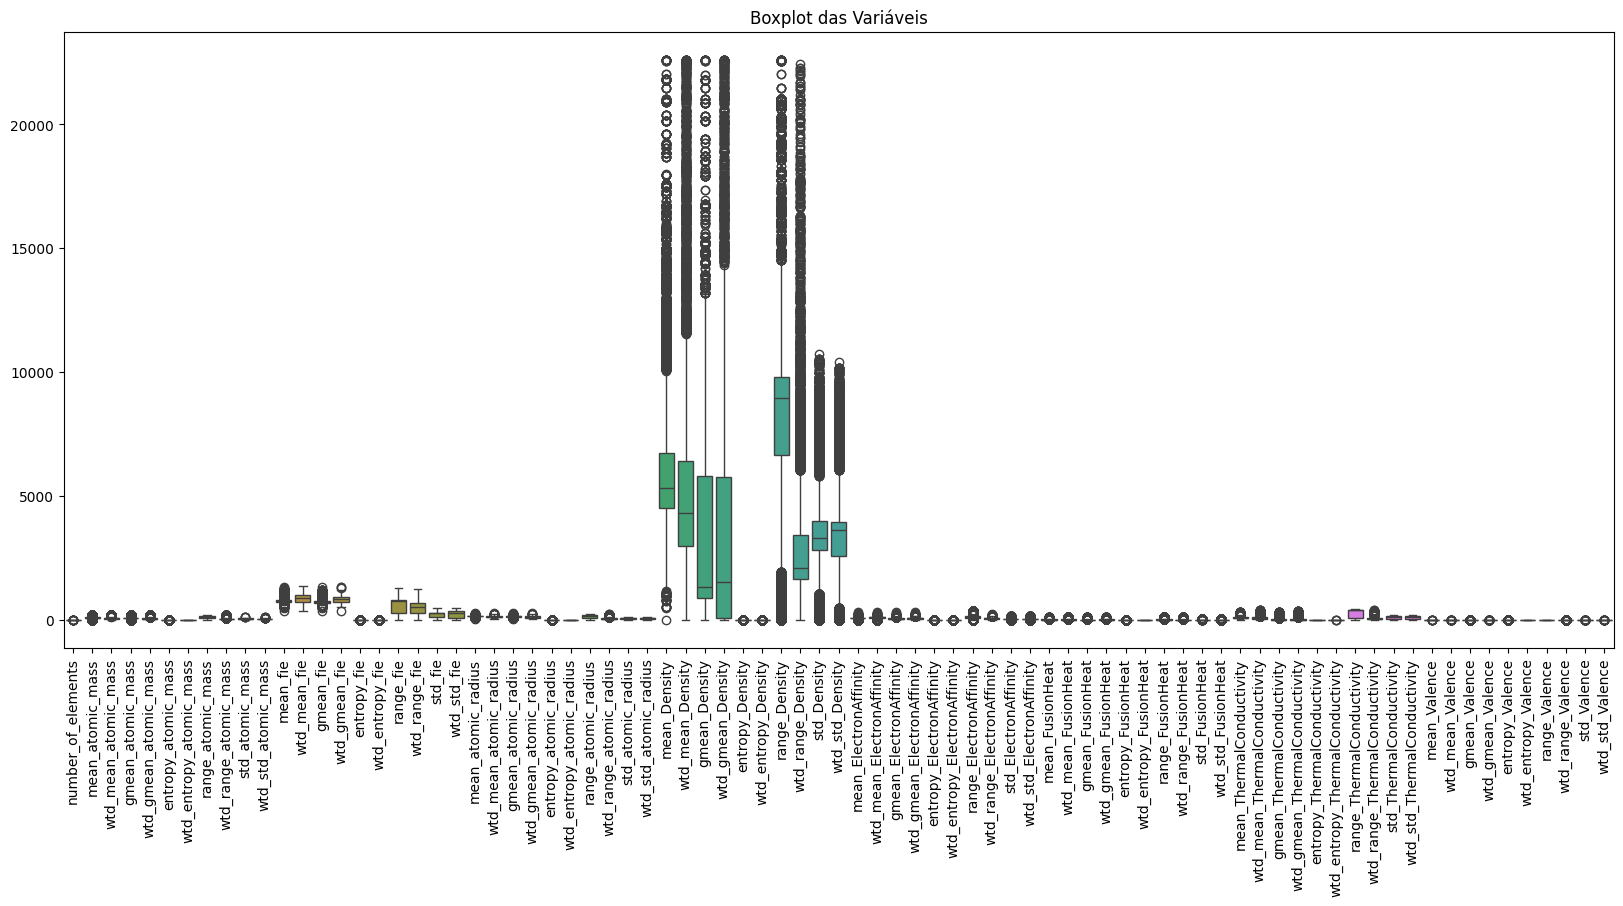

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=dados.drop(columns=['critical_temp']))
plt.title('Boxplot das Variáveis')
plt.xticks(rotation=90)
plt.show()

Mesmo com essa grande quantidade de atributos, ainda conseguimos encontrar uma interpretação para este gráfico. Há sim a presença de *outliers* no conjunto de dados, porém um foco maior estão nas variáveis:
- `mean_Density`
- `wtd_mean_Density`
- `gmean_Density`
- `wtd_gmean_Density`
- `range_Density`
- `wtd_range_Density`
- `std_Density`
- `wtd_range_Density`

o que pode estar associado à alta variabilidade de materiais.

# 2. Preparação dos dados: escalonamento, transformação, particionamento

Devido à existência de muitos *outliers* e algumas escalas serem bastante distintas, como mostrado anteriormente, podemos utilizar o `RobustScaler()` da biblioteca `sklearn` para reescalonar o conjunto de dados e assim melhorar a análise. Antes de fazer isto, precisamos separar a temperatura crítica dos dados, pois ela é nossa variável alvo.

In [ ]:
from sklearn.preprocessing import RobustScaler

X = dados.drop(columns=['critical_temp'])
y = dados['critical_temp']

scaler = RobustScaler()
XScaled = scaler.fit_transform(X)
XScaled = pd.DataFrame(XScaled, columns=X.columns)

Podemos então dividir o conjunto de dados em 80% para treino e 20% para teste, e para isso importamos a função `train_test_split` do `sklearn`.

In [ ]:
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(XScaled, y, test_size=0.2, random_state=42)

Como descrito na parte 1, a distribuição das temperaturas críticas sugere uma transformação logarítmica nos dados para melhorar a normalidade, portanto usamos a biblioteca `numpy`. Como estamos tratando de temperaturas em Kelvin, é impossível que algum dos materiais tenha temperatura crítica igual a zero, o que elimina a necessidade de tratar valores com logarítmo de zero, portanto escolho a função `np.log1p(y)`, que é a mesma coisa que fazer $\ln(y+1)$. Esta escolha parte do pressuposto de que essa função lida bem com valores próximos de zero.

In [ ]:
yTrainLog = np.log1p(yTrain)
yTestLog = np.log1p(yTest)

Note que esta escolha deve ser feita pós particionamento dos dados, para evitar vazamento.

# 3. Avaliar a importância dos atributos com base nos coeficientes de um modelo de regressão linear múltipla (com ou sem regularização, à sua escolha)

Como discutido na parte 1, algumas variáveis possuem uma colinearidade considerável, o que sugere o uso de uma regressão linear com regularização L2 (Ridge), pois assim conseguimos evitar *overfitting*. Para isso importamos a função `Ridge` do `sklearn`. Como o uso do Ridge exije a escolha de um parâmetro de regularização `alpha`, podemos determinar a melhor escolha deste parâmetro utilizando o método de *Grid Search* com validação crizada, usando o `GridSearchCV` e usar como `scoring` o atributo `neg_mean_squared_error`, também do `sklearn`, pois isso otimiza o erro quadrático médio na escala transformada `yTest`.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(random_state=42)
paramGrid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

gridSearch = GridSearchCV(ridge, paramGrid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gridSearch.fit(XTrain, yTrainLog)

bestAlpha = gridSearch.best_params_['alpha']

print("Melhor alpha:", bestAlpha);

Melhor alpha: 0.01


Encontrado o melhor `alpha`, basta aplicarmos o Ridge aos valores de treino `XTrain` e `yTrain`.

In [ ]:
ridge = Ridge(alpha=bestAlpha, random_state=42)
ridge.fit(XTrain, yTrainLog)
yPredRidge = ridge.predict(XTest)

coeficientes = pd.Series(ridge.coef_, index = X.columns)
print(coeficientes.sort_values(ascending = False).head(10))

wtd_mean_fie                 7.746846
wtd_mean_atomic_radius       2.366502
range_fie                    1.507192
wtd_gmean_FusionHeat         1.365609
mean_Valence                 1.005128
wtd_gmean_atomic_mass        0.986664
entropy_atomic_radius        0.865486
wtd_mean_Density             0.822395
gmean_fie                    0.821225
wtd_entropy_atomic_radius    0.818379
dtype: float64


Para verificar o quão bom estão estes dados, podemos utilizar duas métricas: o MSE (`mean_squared_error`) e o R² (`r2_score`), ambos do sklearn.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mseRidge = mean_squared_error(yTestLog, yPredRidge)
r2Ridge = r2_score(yTestLog, yPredRidge)

print("MSE:", mseRidge)
print("R²:", r2Ridge)

MSE: 0.39034631146596926
R²: 0.7663233037235521


O valor de $R^{2} \approx 76.6\%$ indica que cerca de $76.6\%$ da variância da temperatura crítica (em escala logaritmica) pode ser explicada pelas variáveis do modelo. No caso do valor do erro médio quadrático, mesmo que seja um valor considerável, se analisarmos a raiz deste valor (RMSE), e exponenciarmos, teremos $\exp(\sqrt{\text{MSE}}) \approx 1.86$, indicando um erro multiplicativo médio inferior a $2$ na escala original, indicando que o modelo é capaz de capturar a maior parte das tendências que determinam a temperatura crítica. Fazemos isso, pois o valor obtido de MSE está na escala logaritmica, dado que transformamos a variável `y`.

# 4. Avaliar a importância dos atributos com base em um regressor Random Forest ou Gradient Boosting

Escolhendo um regressor Random Forest pra avaliar a importância dos atributos, importamos a função `RandomForestRegressor`do `sklearn`. Da mesma forma que fizemos para determinar o melhor `alpha` na função Ridge, podemos determinar o melhor `n_estimators` da função `RandomForestRegressor` com o `GridSearchCV`. Como o custo computacional pra encontrar esse valor otimizado é muito alto, é preferível definir uma profundidade máxima do Random Forest (que escolho como sendo 10).

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=42)
paramGrid = { 'n_estimators': [150, 250, 350],
              'max_depth': [None, 20, 40],
              'min_samples_leaf': [1, 2, 4]}

gridSearch = GridSearchCV(RFR, paramGrid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
gridSearch.fit(XTrain, yTrain)

bestEstimators = gridSearch.best_params_['n_estimators']
bestDepth = gridSearch.best_params_['max_depth']
bestLeaf = gridSearch.best_params_['min_samples_leaf']

print("Melhor n_estimators:", bestEstimators)
print("Melhor max_depth:", bestDepth)
print("Melhor min_samples_leaf:", bestLeaf)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Melhor n_estimators: 250
Melhor max_depth: 20
Melhor min_samples_leaf: 1
CPU times: user 6min 30s, sys: 13.8 s, total: 6min 44s
Wall time: 3h 49min 2s


Ao verificar os melhores hiperparâmetros selecionados para o Radom Forest, foi determinado após (3h 49min 2s) que o melhor valor de `n_estimators = 350`, o melhor de `max_depth = 20` e o melhor de `min_samples_leaf = 1`. Como o código acima demora muito tempo pra ser executado, após confirmar os valores, torno essa parte do programa um comentário e salvo os melhores valores separadamente.

In [ ]:
bestEstimators = 350
bestDepth = 20
bestLeaf = 1

In [ ]:
RFR = RandomForestRegressor(max_depth=bestDepth, min_samples_leaf=bestLeaf, n_estimators=bestEstimators, random_state=42)
RFR.fit(XTrain, yTrainLog)
yPredRFR = RFR.predict(XTest)

importances = pd.Series(RFR.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

range_ThermalConductivity        0.604150
mean_Density                     0.052367
wtd_gmean_ThermalConductivity    0.038381
wtd_mean_atomic_mass             0.015584
wtd_std_ElectronAffinity         0.015372
wtd_gmean_ElectronAffinity       0.013949
wtd_mean_ThermalConductivity     0.010111
range_atomic_radius              0.009012
std_ThermalConductivity          0.008445
wtd_gmean_Valence                0.008275
dtype: float64


Aqui as variáveis obtidas pelo Random Forest vão ser aquelas que reduzem a variância na predição.

In [ ]:
mseRFR = mean_squared_error(yTestLog, yPredRFR)
r2RFR = r2_score(yTestLog, yPredRFR)

print("MSE:", mseRFR)
print("R²:", r2RFR)

MSE: 0.11751767353522158
R²: 0.9296492860335409


Vemos então que $R^{2} \approx 93.0\%$ a variância da temperatura crícita (em escala logaritmica) pode ser explicada pelas variáveis selecionadas pelo modelo. No caso do erro médio quadrático, se determinarmos o RMSE e exponenciarmos, vamos obter algo como $\exp(\sqrt{\text{MSE}}) \approx 1.41$, indicando um erro multiplicativo ainda menor do que o obtido na regressão linear.

# 5. Com base nos resultados dos itens 3 e 4, selecionar os atributos mais importantes. O número de atributos fica à sua escolha. Justificar sua escolha. Discutir brevemente se os atributos escolhidos possuem significado físico, ou seja, se de fato pode existir uma relação com a variável alvo (temperatura crítica).

Com base nos itens 3 e 4, podemos selecionar os atributos mais importantes combinando os resultados e excluindo variáveis que possuem correlações muito altas entre si, isto é, se dentro dos atributos mais importantes temos atributos altamente correlacionados, apenas o atributo com maior valor de importância (normalizada) vai permanecer na análise. Isto faz com que possamos abranger um pouco mais da física do problema.

Como descrito no item 2, utilizamos um *threshold* de correlação de 0.6, então mantemos esse valor como base.

In [ ]:
corrThreshold = 0.6

Podemos combinar os coeficientes do Ridge e as importâncias do Random Forest e normalizá-las.

In [ ]:
combinedImportances = pd.DataFrame({
    'RFRImportance': importances / importances.max(),
    'ridgeCoeficients': np.abs(coeficientes) / np.abs(coeficientes).max()
}).fillna(0)

Combinamos as métricas, utilizando uma média ponderada baseada no R² dos métodos.

In [ ]:
RFRWeight = r2RFR / (r2RFR + r2Ridge)
ridgeWeight = r2Ridge / (r2RFR + r2Ridge)
combinedImportances['combinedMetrics'] = RFRWeight * combinedImportances['RFRImportance'] + ridgeWeight * combinedImportances['ridgeCoeficients']

Organizamos os atributos em ordem de importância e construimos uma matriz de correlação com o conjunto de treino.

In [ ]:
combinedImportancesSorted = combinedImportances.sort_values('combinedMetrics', ascending=False)
corrMatrix = XTrain.corr().abs()

Definimos uma função que remove variáveis altamente correlacionadas entre si levando em conta uma matriz de correlação, o valor das importâncias (sejam elas combinadas ou não) e o *threshold* pré estabelecido.

In [ ]:
def remove_correlated_features(corrMatrix, importances, threshold):
    selected = []
    excluded = set()

    for feature in importances.index:
        if feature in excluded:
            continue
        selected.append(feature)
        correlated = corrMatrix.index[corrMatrix[feature] > threshold].tolist()
        for c in correlated:
            if c != feature:
                excluded.add(c)
    return selected

Por fim, aplicamos esta função nas variáveis acima definidas e obtemos os atributos de interesse.

In [ ]:
selectedFeatures = remove_correlated_features(corrMatrix, combinedImportancesSorted, corrThreshold)

print("Quantidade de atributos selecionados:", len(selectedFeatures))
for f in selectedFeatures:
    print(f)

Quantidade de atributos selecionados: 14
range_ThermalConductivity
wtd_mean_fie
wtd_mean_atomic_mass
wtd_gmean_FusionHeat
mean_fie
std_atomic_mass
range_Valence
wtd_entropy_fie
wtd_mean_ThermalConductivity
std_ElectronAffinity
wtd_gmean_ElectronAffinity
wtd_std_FusionHeat
entropy_ThermalConductivity
wtd_range_Density


Os atributos mais importantes identificados pelo modelo estão relacionados principalmente às propriedades térmicas, eletrônicas e estruturais dos materiais. Propriedades como condutividade térmica, afinidade e energia de ionização dos elétrons, massa atômica e valência influenciam diretamente a forma como os elétrons interagem com a rede cristalina. Essas interações determinam a energia necessária para a transição ao estado supercondutor, e portanto, contribuem com a temperatura crítica.

# 6. Aplicar uma técnica de redução de dimensionalidade, como PCA (análise de componentes principais), criando novos atributos a partir de uma combinação dos atributos originais. O número de componentes principais a serem utilizadas fica à sua escolha (justificar escolha).  

Utilizando o PCA para redução de dimensionalidade, importamos esta função do `sklearn` e aplicamos os dados de `XScaled` nela.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
XScaledPCA = pca.fit_transform(XScaled)

Feito isso, podemos determinar a quantidade de variáveis que vão descrever pelo menos 90% da variâncias dos dados com base na proporção de variância explicada por cada componente principal do PCA seguida de uma soma cumulativa destas proporções, que vai ser a explicabilidade.

In [ ]:
propVarExpl = pca.explained_variance_ratio_
explanability = propVarExpl.cumsum()
factors = np.arange(1, XScaledPCA.shape[1] + 1, 1)
p = factors[explanability < 0.9].max() + 1
if p < 2:
  p = 2

print(f"90% dos dados são explicados por {str(p)} componentes")

90% dos dados são explicados por 11 componentes


Com isso podemos aplicar o PCA com 11 componentes.

In [ ]:
pca = PCA(n_components = p)
XScaledPCA = pca.fit_transform(XScaled)

In [ ]:
XScaledPCA = pd.DataFrame(XScaledPCA, columns=[f'PCA{i+1}' for i in range(p)])

XScaledPCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-2.613069,-1.564338,-1.185335,1.200301,-1.539314,0.694075,0.142080,-0.549558,-0.496183,-0.741646,-0.155020
1,-3.069411,-1.703630,-0.098695,0.231543,-1.262720,0.875215,0.559206,-0.120031,0.211385,-1.265916,0.169184
2,-2.446743,-1.584737,-1.164068,1.269864,-1.602494,0.595763,0.326929,-0.662233,-0.527642,-0.816391,-0.174465
3,-2.533493,-1.574762,-1.173162,1.232572,-1.568335,0.645942,0.233473,-0.604639,-0.511368,-0.779533,-0.163746
4,-2.757162,-1.543327,-1.216378,1.146762,-1.492136,0.785800,-0.036822,-0.444652,-0.468753,-0.663989,-0.142220


Uma análise extra seria: com base nas 11 componentes principais, podemos determinar quais são os atributos originais que mais contribuem para variância dos dados considerando um *threshold* de 0.35. Este valor é estabelecido com base no seguinte argumento: o *threshold* mais usual em análises com PCA é de 0.3, porém este valor nos retornaria 18 atributos, o que é um número muito grande e é melhor ser um pouco mais restritivo, portanto estabelecer um *threshold* de 0.35 reduz a quantidade de atributos a 10 e melhora a determinação dos atributos mais importantes.

In [ ]:
pcaComponents = pd.DataFrame(
    pca.components_.T,
    columns=[f'PCA{i+1}' for i in range(p)],
    index=XScaled.columns
)

maxComponents = abs(pcaComponents).max(axis=1)
features = maxComponents[maxComponents >= 0.35].sort_values(ascending=False)

features


,0
wtd_std_FusionHeat,0.501619
wtd_mean_ThermalConductivity,0.482278
range_FusionHeat,0.464858
std_ElectronAffinity,0.441864
std_FusionHeat,0.432842
std_Density,0.387866
gmean_atomic_mass,0.382578
wtd_range_Density,0.380235
wtd_std_ElectronAffinity,0.370153
wtd_entropy_ElectronAffinity,0.352686


# 7. Construir um modelo de regressão linear múltipla com:  
# a) os atributos mais importantes, escolhidos no item 5;  
# b) usando as componentes principais como atributos (item 6).
# Comparar o desempenho desses modelos na predição da temperatura crítica e a sua interpretabilidade (isto é, se é fácil ou não interpretar o significado físico dos coeficientes ajustados). Avalie se o modelo é capaz de predizer diferentes faixas de valores de temperatura crítica.

Com os atributos selecionados no item 5 (`selectedFeatures`), podemos separar o conjunto de treino (`XTrain`) e conjunto de teste (`XTest`) selecionando essas variáveis.

In [ ]:
XTrainSelected = XTrain[selectedFeatures]
XTestSelected = XTest[selectedFeatures]

Fazendo então o modelo de regressão linear com regularização L2 (Ridge) com esses atributos.

In [ ]:
ridgeSelected = Ridge(alpha=bestAlpha, random_state=42)
ridgeSelected.fit(XTrainSelected, yTrainLog)
yPredRidgeSelected = ridgeSelected.predict(XTestSelected)

mseRidgeSelected = mean_squared_error(yTestLog, yPredRidgeSelected)
r2RidgeSelected = r2_score(yTestLog, yPredRidgeSelected)

print("MSE:", mseRidgeSelected)
print("R²:", r2RidgeSelected)

MSE: 0.579789840505915
R²: 0.6529149360852038


No caso das componentes do PCA, para evitar vazamento de dados, refazemos o PCA com 11 componentes no conjunto de treino (`XTrain`) e no de teste (`XTest`).

In [ ]:
XTrainPCA = pca.fit_transform(XTrain)
XTestPCA = pca.transform(XTest)

ridgePCA = Ridge(alpha=bestAlpha, random_state=42)
ridgePCA.fit(XTrainPCA, yTrainLog)
yPredRidgePCA = ridgePCA.predict(XTestPCA)

mseRidgePCA = mean_squared_error(yTestLog, yPredRidgePCA)
r2RidgePCA = r2_score(yTestLog, yPredRidgePCA)

print("MSE:", mseRidgePCA)
print("R²:", r2RidgePCA)

MSE: 0.5906987562390906
R²: 0.6463844289083507


Quando utilizamos todos os atributos, o $R^{2} \approx 76.6\%$, e nestes dois ultimos casos obtivemos $R^{2}_{\text{slctd}} \approx 65.3\%$ e $R^{2}_{\text{PCA}} \approx 64.6\%$, portanto, mesmo reduzindo bastante a dimensionalidade, os valores ainda são relativamente próximos, com uma diferença da ordem de $\sim 10\%$, o que é aceitável, tendo em mente que inicialmente tinhamos 81 atributos e reduzimos para 14 deles no primeiro método e 11 componentes principais no segundo.

No caso do resultado para os atributos selecionados ($R^{2}_{\text{slctd}}$), o significado físico é interpretável, pois estamos utilizando os atributos originais do problema, selecionando apenas os mais influentes. No caso das componentes principais do PCA ($R^{2}_{\text{PCA}}$), nós temos uma combinações lineares dos atributos originais, então interpretar fisicamente os coeficientes acaba sendo mais difícil.

Para verificar o quão bem os modelos predizem a temperatura crítica em diferentes faixas, podemos criar uma função que verifica o MSE em 3 diferentes regiões de temperatura, levando em conta que a temperatura crítica varia de $0.000210$ a $185~\text{K}$: abaixo de $60~\text{K}$, num intervalo entre $60$ e $120~\text{K}$ e acima de $120~\text{K}$.

In [ ]:
def mseValues(yTrue, yPred, yOriginal):
  temp = [0, 60, 120, np.inf]
  tempLabels = ['(<60K)', '(60-120K)', '(>120K)']
  groups = pd.cut(yOriginal, bins=temp, labels=tempLabels)

  for temps in tempLabels:
    mask = groups == temps
    if mask.sum() > 0:
      groupMSE = mean_squared_error(yTrue[mask], yPred[mask])
      print(f"MSE {temps}: {groupMSE}")

Com essa função podemos avaliar o MSE para cada faixa de temperatura de cada um dos modelos usados.

In [ ]:
print("Ridge dos atributos selecionados:")
mseValues(yTestLog, yPredRidgeSelected, yTest)

print("\nRidge do PCA:")
mseValues(yTestLog, yPredRidgePCA, yTest)

Ridge dos atributos selecionados:
MSE (<60K): 0.6619997669538773
MSE (60-120K): 0.33651629841528335
MSE (>120K): 0.32663991238347967

Ridge do PCA:
MSE (<60K): 0.6732424357626846
MSE (60-120K): 0.34564439110905343
MSE (>120K): 0.35700521359657433


É perceptível então que para faixas de temperatura mais altas, ambos os modelos possuem um erro multiplicativo mais baixo, porém para temperaturas menores o MSE é alto o suficiente para ser considerado problemático. Isso pode ser explicado possivelmente pela alta quantidade de materiais que possuem temperatura abaixo de $60~\text{K}$, conforme pode ser visto no histograma de temperatura crítica na parte 1, gerando uma alta variabilidade nos dados e talvez uma previsibilidade reduzida.

# 8. Construir um modelo de regressão baseado em Random Forest ou Gradient Boosting com:  
# a) apenas os atributos mais importantes, escolhidos no item 5;  
# b) usando as componentes principais como atributos (item 6).
# Lembre-se de otimizar os hiperparâmetros. Comparar o desempenho desses modelos na predição da temperatura crítica e sua interpretabilidade. Avalie se o modelo é capaz de predizer diferentes faixas de valores de temperatura crítica.

Fazendo o mesmo procedimento feito no item 7, porém utilizando Random Forest, precisamos otimizar alguns hiperparâmetros que serão utilizados, como foi feito no item 4, então usamos o GridSearchCV com os mesmos hiperparâmetros escolhidos no item 4, isto é

In [ ]:
paramGrid = { 'n_estimators': [100, 200, 350],
              'max_depth': [None, 20, 40],
              'min_samples_leaf': [1, 2, 4]}

A partir disso, fazemos o o procedimento de encontrar esses hiperparâmetros. Como o código abaixo demorou 38min 38s, armazenamos os valores separadamente para execução mais rápida do que queremos de fato determinar, que será o $R^{2}_{\text{RFR}}$ e o MSE utilizando Random Forest.

In [ ]:
%%time
RFRSelected = RandomForestRegressor(random_state=42)
gridSearchSelected = GridSearchCV(RFRSelected, paramGrid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gridSearchSelected.fit(XTrainSelected, yTrainLog)

bestEstimatorsSelected = gridSearchSelected.best_params_['n_estimators']
bestDepthSelected = gridSearchSelected.best_params_['max_depth']
bestLeafSelected = gridSearchSelected.best_params_['min_samples_leaf']

print("Melhor n_estimators:", bestEstimatorsSelected)
print("Melhor max_depth:", bestDepthSelected)
print("Melhor min_samples_leaf:", bestLeafSelected)

Melhor n_estimators: 350
Melhor max_depth: 40
Melhor min_samples_leaf: 1
CPU times: user 1min 48s, sys: 0 ns, total: 1min 48s
Wall time: 38min 58s


In [ ]:
bestEstimatorsSelected = 350
bestDepthSelected = 40
bestLeafSelected = 1

Com estes hiperparâmetros, podemos determinar os valores de MSE e $R^{2}_{\text{RFR}}$ com apenas os atributos selecionados no item 5.

In [ ]:
%%time
RFRSelected = RandomForestRegressor(max_depth=bestDepthSelected, min_samples_leaf=bestLeafSelected, n_estimators=bestEstimatorsSelected, random_state=42)
RFRSelected.fit(XTrainSelected, yTrainLog)
yPredRFRSelected = RFRSelected.predict(XTestSelected)

mseRFRSelected = mean_squared_error(yTestLog, yPredRFRSelected)
r2RFRSelected = r2_score(yTestLog, yPredRFRSelected)

print("MSE:", mseRFRSelected)
print("R²:", r2RFRSelected)

MSE: 0.12665666417875918
R²: 0.9241783258165404
CPU times: user 1min 41s, sys: 0 ns, total: 1min 41s
Wall time: 1min 41s


Comparando os valores de $R^{2} \approx 93.0\%$ obtido com todos os atributos e o $R^{2}_{\text{RFR}} \approx 92.4\%$ obtido apenas com os atributos selecionados, temos uma diferença praticamente irrelevante neste valor, da ordem de $\sim 0.6\%$, portanto o Random Forest apenas com os atributos selecionados acaba sendo muito bom para prever a temperatura crítica.

Fazendo o mesmo procedimento para as componentes principais, temos primeiro otimizando os hiperparâmetros:

In [ ]:
%%time
paramGrid = { 'n_estimators': [100, 200, 350],
              'max_depth': [None, 20, 40],
              'min_samples_leaf': [1, 2, 4]}

RFRPCA = RandomForestRegressor(random_state=42)
gridSearchPCA = GridSearchCV(RFRPCA, paramGrid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gridSearchPCA.fit(XTrainPCA, yTrainLog)

bestEstimatorsPCA = gridSearchPCA.best_params_['n_estimators']
bestDepthPCA = gridSearchPCA.best_params_['max_depth']
bestLeafPCA = gridSearchPCA.best_params_['min_samples_leaf']

print("Melhor n_estimators:", bestEstimatorsPCA)
print("Melhor max_depth:", bestDepthPCA)
print("Melhor min_samples_leaf:", bestLeafPCA)

Melhor n_estimators: 350
Melhor max_depth: 40
Melhor min_samples_leaf: 1
CPU times: user 1min 58s, sys: 68.9 ms, total: 1min 58s
Wall time: 41min 27s


Como o comando acima demora 41min 27s, os melhores parâmetros vão ser armazenados separadamente.

In [ ]:
bestEstimatorsPCA = 350
bestDepthPCA = 40
bestLeafPCA = 1

E com isso o Random Forest com as componentes principais vai ficar:

In [ ]:
%%time
RFRPCA = RandomForestRegressor(max_depth=bestDepthPCA, min_samples_leaf=bestLeafPCA, n_estimators=bestEstimatorsPCA, random_state=42)
RFRPCA.fit(XTrainPCA, yTrainLog)
yPredRFRPCA = RFRPCA.predict(XTestPCA)

mseRFRPCA = mean_squared_error(yTestLog, yPredRFRPCA)
r2RFRPCA = r2_score(yTestLog, yPredRFRPCA)

print("MSE:", mseRFRPCA)
print("R²:", r2RFRPCA)

MSE: 0.14267285887327238
R²: 0.9145904000357674
CPU times: user 1min 50s, sys: 275 ms, total: 1min 50s
Wall time: 1min 51s


Vemos então que em comparação, os valores de $R^{2} \approx 93.0\%$ e $R^{2}_{\text{PCA}} \approx 91.5\%$ são bem próximo, com uma diferença apenas da ordem de $\sim 1.5\%$, o que se mantém muito bom para previsibilidade dos valores de temperatura, porém interpretar fisicamente este caso acaba sendo inviável, por estarmos novamente tratando de uma combinação linear dos atributos mais relevantes.

Usando então a função `mse_values` criada, podemos verificar a capacidade de predição dos 2 métodos em diferentes faixas de temperatura.

In [ ]:
print("Random Forest dos atributos selecionados:")
mseValues(yTestLog, yPredRFRSelected, yTest)

print("\nRandom Forest do PCA:")
mseValues(yTestLog, yPredRFRPCA, yTest)

Random Forest dos atributos selecionados:
MSE (<60K): 0.15579846994429303
MSE (60-120K): 0.041285222868479916
MSE (>120K): 0.014600577656779823

Random Forest do PCA:
MSE (<60K): 0.17247268155669102
MSE (60-120K): 0.05577584675594284
MSE (>120K): 0.01770229347152548


Os valores de MSE para os dois métodos e para todas as faixas de temperatura consideradas foram bem baixas, o que é muito bom, pois o erro multiplicativo vai ser bem baixo para todas as faixas, sendo maior apenas na faixa onde tempo mais materiais que é para temperatura crítica $<60~\text{K}$.

# 9.  Fazer uma breve discussão crítica sobre o desempenho, a interpretabilidade e o custo computacional dos modelos lineares e dos modelos baseados em árvores de decisão.

Ao olharmos para o fator desempenho dos modelos, temos que os modelos baseados em árvores de decisão, neste caso o Random Forest, são mais eficientes em relação à previsibilidade da temperatura crítica, porém o custo computacional é extremamente maior, mesmo considerando menos atributos. Quando otimizamos os hiperparâmetros do Random Forest utilizando o `GridSerchCV` com todos os atributos, o custo computacional foi da ordem de $\sim 4$ horas, o que muitas vezes acaba sendo inviável, então reduzir a dimensionalidade dos atributos considerados em aproximadamente $4$ vezes reduziu esse custo quase em $4$ vezes também, mas ainda sendo muito mais custoso que um modelo linear de regressão.

Utilizando a redução de dimensionalidade das componentes principais, conseguimos predizer de forma consideravelmente boa os valores de temperatura crítica, porém acabamos perdendo a interpretabilidade física, pois cada componente principal vai utilizar de combinações lineares dos atributos originais diferentes, o que muitas vezes pode não ser muito bom, pois perdemos informações importantes, como o tipo de relação que um certo atributo terá com a temperatura crítica.

Podemos então concluir que os modelos de árvore de decisão são mais adequados para determinar a temperatura crítica dos materiais, principalmente considerando o caso onde consideramos apenas 14 dos 81 atributos originais, como feito no item 8.(a).